In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
np.random.seed(42)

In [3]:
num_genuine = 1000
num_fraudulent = 50

In [4]:
num_features = 5

In [5]:
genuine_transactions = np.random.normal(0, 1, size=(num_genuine, num_features))
fraudulent_transactions = np.random.normal(5, 2, size=(num_fraudulent, num_features))

In [6]:
data = np.vstack([genuine_transactions, fraudulent_transactions])
labels = np.hstack([np.zeros(num_genuine), np.ones(num_fraudulent)])

print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Shape of data: (1050, 5)
Shape of labels: (1050,)


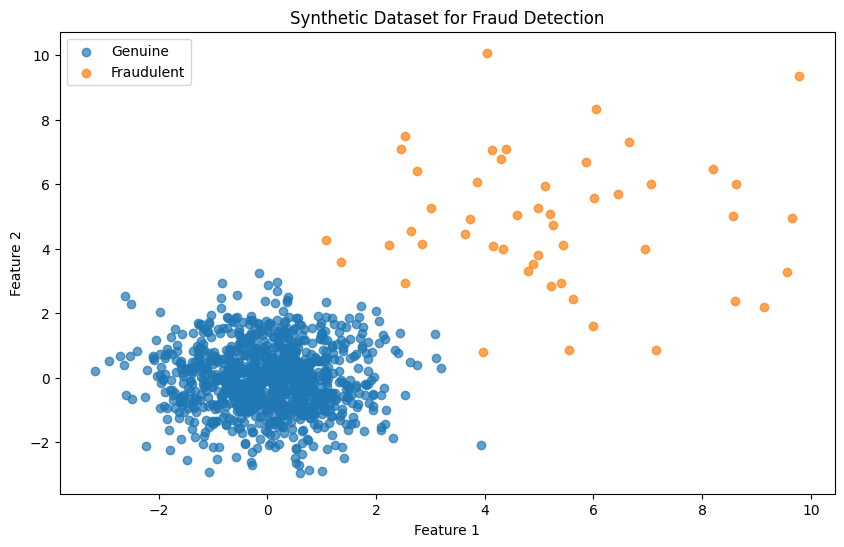

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(genuine_transactions[:, 0], genuine_transactions[:, 1], label='Genuine', alpha=0.7)
plt.scatter(fraudulent_transactions[:, 0], fraudulent_transactions[:, 1], label='Fraudulent', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Fraud Detection')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

ModuleNotFoundError: No module named 'sklearn'

In [10]:
latent_dim = 10
num_features = X_train.shape[1]

# Generator model
generator = Sequential([
    Dense(15, activation='relu', input_dim=latent_dim),
    Dense(num_features, activation='linear')
])

NameError: name 'X_train' is not defined

In [11]:
discriminator = Sequential([
    Dense(15, activation='relu', input_dim=num_features),
    Dense(1, activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [12]:
discriminator.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'discriminator' is not defined

In [13]:
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')

NameError: name 'discriminator' is not defined

In [15]:
epochs = 1000
batch_size = 32

for epoch in range(epochs):
    # Generate fake samples
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    fake_data = generator.predict(noise)

    # Select a random batch of real samples
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]

    # Combine fake and real samples
    X = np.concatenate([real_data, fake_data])
    y_dis = np.zeros(2 * batch_size)
    y_dis[:batch_size] = 0.9  # label smoothing

    # Train discriminator
    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(X, y_dis)

    # Train generator (via the full GAN model, where the discriminator weights are frozen)
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    y_gen = np.ones(batch_size)
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, y_gen)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

# Generate some synthetic fraud samples for visualization
num_fraudulent = 1000
noise = np.random.normal(0, 1, size=[num_fraudulent, latent_dim])
generated_fraud = generator.predict(noise)

NameError: name 'generator' is not defined

In [16]:
fraudulent_transactions = X_train[Y_train == 1]

# Plotting the generated fraud samples along with original fraud samples
plt.figure(figsize=(10, 6))
plt.scatter(fraudulent_transactions[:, 0], fraudulent_transactions[:, 1], label='Original Fraudulent', alpha=0.7)
plt.scatter(generated_fraud[:, 0], generated_fraud[:, 1], label='Generated Fraudulent', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated vs Original Fraudulent Transactions')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined